# Online Retail Store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Dataset

The dataset  contains transactional data of an online retail store from 2010 to 2011.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

In [2]:
data = pd.read_excel(r"C:\Users\stefa\Downloads\online_retail\Online Retail.xlsx")

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Cleaning the data

 - Removing duplicate and incomplete cases
 - Ensuring answers are formatted correctly
 - Removing negative values from non-negative variables
 - Deleting columns not needed in the analysis
 - Making new columns


In [5]:
# removing duplicated values
data = data.drop_duplicates()

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data = data[(data['Quantity'] >= 1) & (data['UnitPrice'] > 0)]

In [8]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

In [9]:
data.nunique()

InvoiceNo      19960
StockCode       3922
Description     4026
Quantity         375
InvoiceDate    18499
UnitPrice       1291
CustomerID      4338
Country           38
dtype: int64

In [10]:
data = data.drop(columns = ['Description'])

In [11]:
# making two new columns, the first containing a date without time and a column containing hours
data['Date'] = data['InvoiceDate'].dt.date
data['Hour'] = data['InvoiceDate'].dt.hour
data.head(3)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Hour
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8


In [12]:
# deleting the unnecessary column
data = data.drop(columns = ['InvoiceDate'])

In [13]:
# adding a Revenue column
data['Revenue'] = data['UnitPrice'] * data['Quantity']

In [14]:
# converting Date to datetime

data['Date'] = pd.to_datetime(data['Date'])

In [15]:
# a new dataset that doesn't contain NAN values for customers to use later for the top 10 customers
data1 = data.dropna(axis=0, how='any').copy(deep=False)
data1['CustomerID'] = data1['CustomerID'].apply(lambda x: '{:.0f}'.format(x))
# formating CustomerID
data['CustomerID'] = data['CustomerID'].apply(lambda x: '{:.0f}'.format(x))

# Goals

We are going to see:
- the busiest months and hours
- top 10 costumers who spend the most 
- top 5 products which make the most revenue
- the country that contributes the most to profits

# Analysis

## Month
While the average revenue by month shows consistency throughout the year, it is noteworthy that the highest revenue and invoice counts are concentrated in the last quarter (September, October, November, and December). This observation suggests that the holiday season significantly impacts our sales performance, highlighting the importance of strategic planning and marketing during this period.

## Hour
The analysis of hourly activity patterns reveals that the busiest hours are between 10 a.m. and 3 p.m. During this time frame, there is a higher volume of transactions, indicating increased customer engagement. The hour with the most invoices is 12 p.m., suggesting that this is a critical time for processing orders efficiently. Interestingly, the average revenue at 7 a.m. stands out significantly, exceeding more than twice the average of other hours. This anomaly deserves further investigation to understand what drives this early morning surge in revenue and whether it can be leveraged for sustained growth.

## Top custumers
The IDs of the top 10 customers who consistently spend the most are 14646, 18102, 17450, 16446, 14911, 12415, 14156, 17511, 16029, and 12346. This valuable insight allows us to tailor our customer engagement strategies and provide personalized incentives to retain these high-value clients.

## Top products

The analysis reveals that the stock codes for the top 5 products that contribute the most to revenue are: DOT, 22423, 23843, 85123A, and 47566. Recognizing these products enables us to optimize marketing, pricing, and inventory management strategies, potentially increasing overall profitability.

## Country
A significant insight is that the United Kingdom contributes a substantial portion of the revenue, accounting for an impressive 85% of all sales. The country behind the UK is the Netherlands with a contribution to the revenue of 2.6%. The concentration in the UK highlights the importance of maintaining a strong presence and tailored strategies in this key market.


In [16]:
# grouping the data by month
data_m = data.groupby(data['Date'].dt.month)

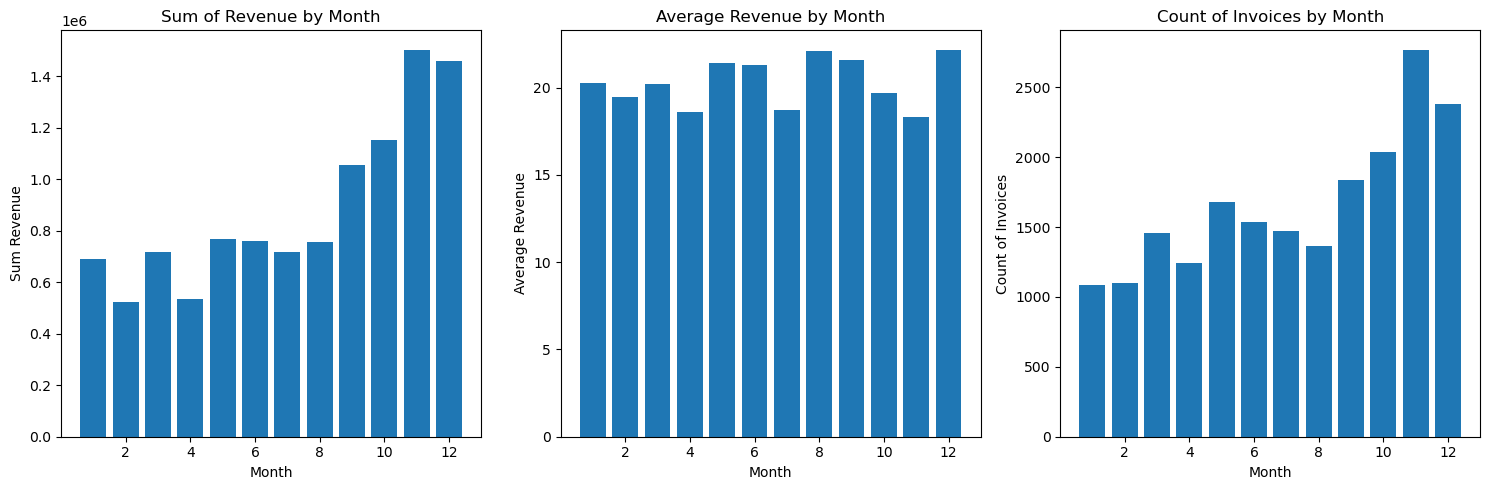

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(data_m['Revenue'].sum().index, data_m['Revenue'].sum().values)
axes[0].set_title('Sum of Revenue by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sum Revenue')

axes[1].bar(data_m['Revenue'].mean().index, data_m['Revenue'].mean().values)
axes[1].set_title('Average Revenue by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Revenue')

axes[2].bar(data_m['InvoiceNo'].nunique().index, data_m['InvoiceNo'].nunique().values)
axes[2].set_title('Count of Invoices by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count of Invoices')

plt.tight_layout()
plt.show()

In [18]:
# grouping the data by month 
data_h =data.groupby(data['Hour'])

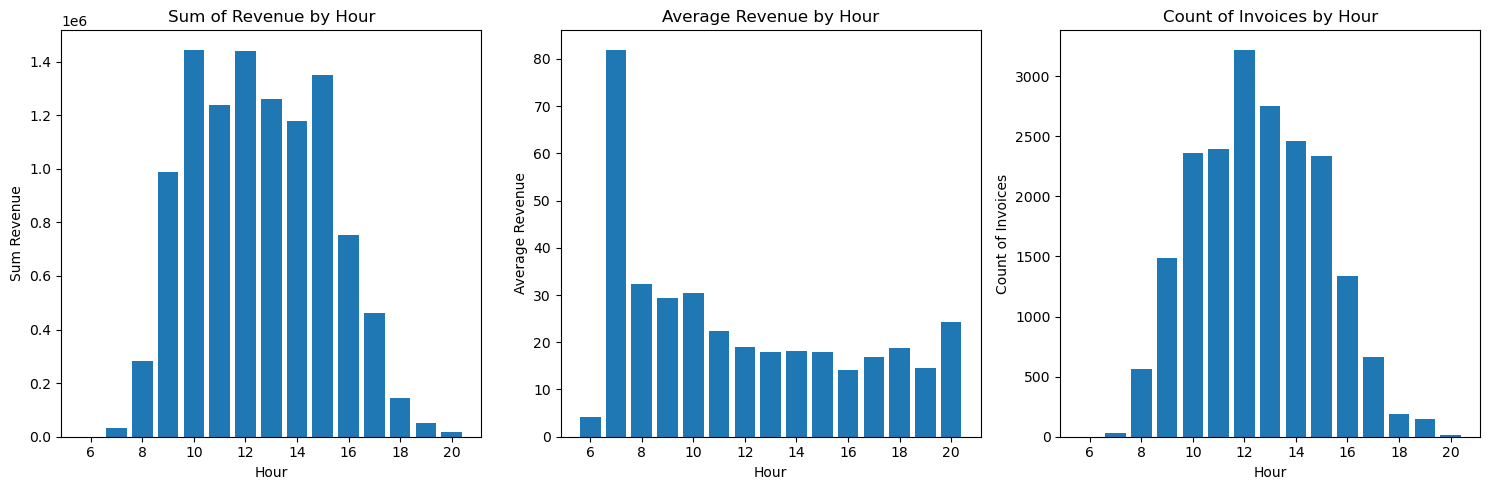

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(data_h['Revenue'].sum().index, data_h['Revenue'].sum().values)
axes[0].set_title('Sum of Revenue by Hour')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Sum Revenue')

axes[1].bar(data_h['Revenue'].mean().index, data_h['Revenue'].mean().values)
axes[1].set_title('Average Revenue by Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Average Revenue')

axes[2].bar(data_h['InvoiceNo'].nunique().index, data_h['InvoiceNo'].nunique().values)
axes[2].set_title('Count of Invoices by Hour')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count of Invoices')

plt.tight_layout()
plt.show()

In [20]:
# calculating top 10 custumers by Revenue
top_10_custumers = data1.groupby('CustomerID')['Revenue'].sum().sort_values(ascending = False).head(10)
top_10_custumers

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: Revenue, dtype: float64

In [21]:
# calculating top 5 products
top_5_products = data.groupby('StockCode')['Revenue'].sum().sort_values(ascending = False).head(5)
top_5_products

StockCode
DOT       206248.77
22423     174156.54
23843     168469.60
85123A    104462.75
47566      99445.23
Name: Revenue, dtype: float64

In [22]:
# grouping data by country to see which countries contribute the most revenue
data_country = data.groupby('Country')['Revenue'].sum().sort_values()
data_country.tail(5)

Country
France             209625.370
Germany            228678.400
EIRE               283140.520
Netherlands        285446.340
United Kingdom    9001744.094
Name: Revenue, dtype: float64

In [23]:
data['C'] = data['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Other')
data.head(3)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Date,Hour,Revenue,C
0,536365,85123A,6,2.55,17850,United Kingdom,2010-12-01,8,15.30,UK
1,536365,71053,6,3.39,17850,United Kingdom,2010-12-01,8,20.34,UK
2,536365,84406B,8,2.75,17850,United Kingdom,2010-12-01,8,22.00,UK


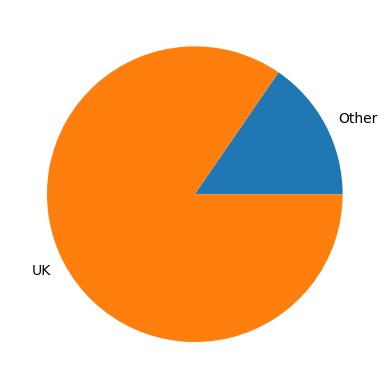

In [24]:
# pie chart to see the ratio between the UK and the other countries
data_c = data.groupby('C')['Revenue'].sum()
plt.pie(data_c, labels = data_c.index)
plt.show() 